1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

a. Terdapat EDA untuk menganalisis data dan praproses yang dibutuhkan algoritma
b. Terdapat pembagian data latih dan data uji
c. Terdapat setting parameter algoritma
d. Terdapat pengujian performansi data
e. Terdapat analisis model akhir yang direpresentasikan kedalam visual grafik


# 1. Problem Definition

> Membangun model klasifikasi yang akan membantu memprediksi apakah seorang siswa di kelas tertentu akan lulus atau gagal tergantung pada beberapa kategori yang berlaku untuk setiap siswa.

# 2. Data

Dataset ini berisi data prestasi siswa pada pendidikan menengah di dua sekolah Portugis. Atribut data meliputi nilai siswa, demografi, sosial dan fitur terkait sekolah dan data ini dikumpulkan dengan menggunakan laporan sekolah serta kuesioner.
> Data asli diperoleh dari dataset Student Performance dari repositori UCI Mechine Learning. https://archive.ics.uci.edu/dataset/320/student+performance

# 3. Features

Dataset memiliki 395 baris dan 33 kolom. Nilai target diambil dari kolom G3 (Nilai akhir untuk menentukan lulus atau gagal)

**Data Dictionary**

1. school - sekolah siswa 
    - binary: 
        * "GP" - Gabriel Pereira
        * "MS" - Mousinho da Silveira
2. sex - jenis kelamin siswa (binary: "F" - female or "M" - male)
3. age - umur siswa (numeric: from 15 to 22)
4. address - jenis alamat rumah siswa (binary: "U" - urban or "R" - rural)
5. famsize - ukuran keluarga (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - status hidup bersama orang tua (binary: "T" - living together or "A" - apart)
7. Medu - pendidikan ibu (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - pendidikan ayah (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - pekerjaan ibu (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - pekerjaan ayah (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - alasan memilih sekolah ini (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - wali siswa (nominal: "mother", "father" or "other")
13. traveltime - waktu perjalanan dari rumah ke sekolah (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - waktu belajar mingguan (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - jumlah kegagalan kelas sebelumnya (numeric: n if 1<=n<3, else 4)
16. schoolsup - dukungan pendidikan tambahan (binary: yes or no)
17. famsup - dukungan pendidikan keluarga (binary: yes or no)
18. paid - ekstra berbayar dalam mata pelajaran (Matematika atau Portugis) (binary: yes or no)
19. activities - kegiatan ekstra kurikuler(binary: yes or no)
20. nursery - ersekolah di taman kanak-kanak (binary: yes or no)
21. higher - ingin mengambil pendidikan tinggi (binary: yes or no)
22. internet - Akses internet di rumah (binary: yes or no)
23. romantic - Akses internet di rumah (binary: yes or no)
24. famrel - kualitas hubungan keluarga (numeric: from 1 - very bad to 5 - excellent)
25. freetime - waktu luang sepulang sekolah (numeric: from 1 - very low to 5 - very high)
26. goout - pacaran dengan teman (numeric: from 1 - very low to 5 - very high)
27. Dalc - konsumsi alkohol pada hari kerja (numeric: from 1 - very low to 5 - very high)
28. Walc - konsumsi alkohol akhir pekan (numeric: from 1 - very low to 5 - very high)
29. health - status kesehatan saat ini (numeric: from 1 - very bad to 5 - very good)
30. absences - jumlah ketidakhadiran di sekolah (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

# 4. Data Preprocessing

## Preparing the tools

In [168]:
# Regulaar EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [113]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [114]:
# Make column target to see which student passeed pr failed
df.drop(['G1', 'G2'], axis=1, inplace=True)
df['target'] = 0
df.loc[df['G3'] >= 10, 'target'] = 1
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,1


## EDA (_Exploratory Data Analysis_)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [73]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
target        0
dtype: int64

In [74]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,target
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190,0.670886
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443,0.470487
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000,1.000000


### Comparison of passed and failed

In [75]:
# Find out how many of each class
df['target'].value_counts()

1    265
0    130
Name: target, dtype: int64

<AxesSubplot:>

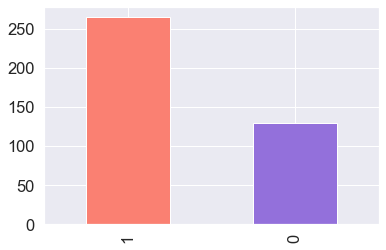

In [76]:
df['target'].value_counts().plot(kind='bar', color = ['salmon', 'mediumpurple'])

### Distribution of final grade (G3)

Text(0.5, 0, 'Final Grade')

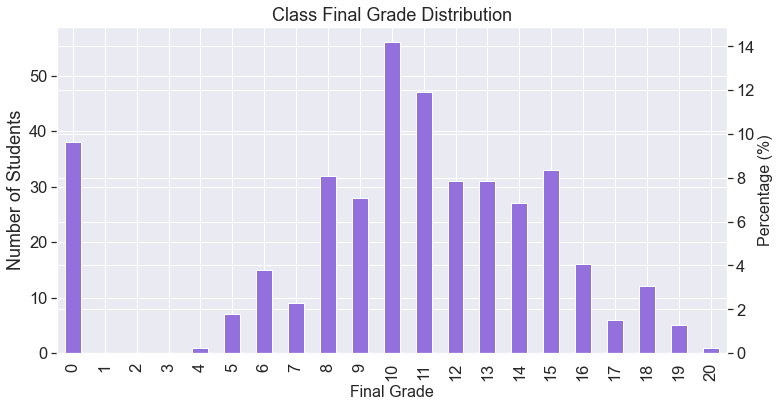

In [77]:
final_grade = df['G3'].value_counts()

for fg in range(0, 21):
    if fg not in final_grade.index:
        final_grade.loc[fg] = 0
        
final_grade.sort_index(inplace=True)

# Creating the bar plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
final_grade.plot(ax=ax1, kind='bar', color='mediumpurple')

# Creating second Y axis to display percentages
ax2 = ax1.twinx()
num_rows = df['G3'].shape[0]
final_grade_percents = final_grade/num_rows * 100
final_grade_percents.plot(ax=ax2, kind='bar', color='mediumpurple')

ax1.set_title("Class Final Grade Distribution", fontsize=18)
ax1.set_ylabel("Number of Students", fontsize=18)
ax2.set_ylabel('Percentage (%)', fontsize=16)
ax1.set_xlabel('Final Grade', fontsize=16)

<AxesSubplot:ylabel='Frequency'>

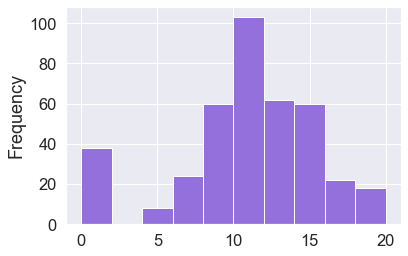

In [78]:
df.G3.plot.hist(color='mediumpurple')

### Frequency of students passing by Gender

In [79]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [80]:
pd.crosstab(df.target, df.sex)

sex,F,M
target,,
0,75,55
1,133,132


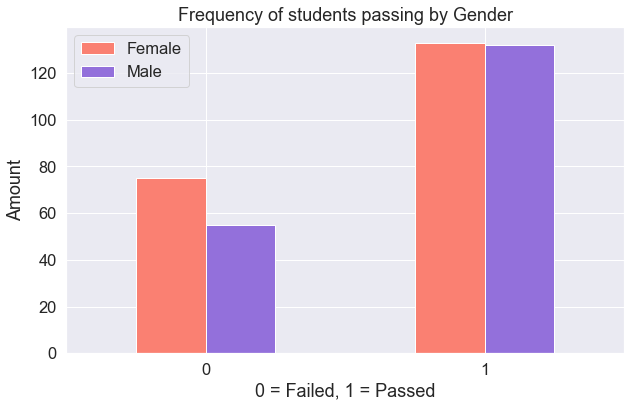

In [81]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "mediumpurple"])

plt.title("Frequency of students passing by Gender")
plt.xlabel("0 = Failed, 1 = Passed")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Student have access to the internet

<AxesSubplot:>

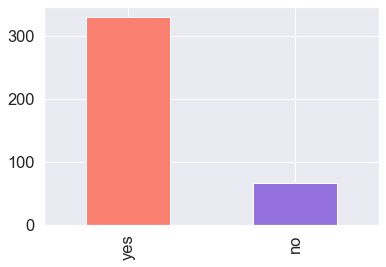

In [82]:
df['internet'].value_counts().plot(kind='bar', color = ['salmon', 'mediumpurple'])

### Frequency of students absences

Text(0.5, 1.0, 'Student Absences')

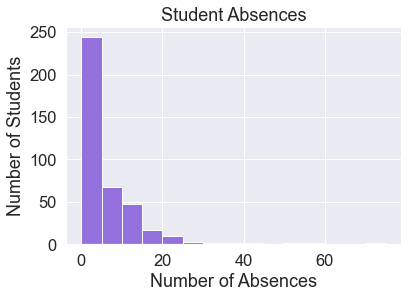

In [83]:
df['absences'].plot(kind='hist', bins=15, color='mediumpurple')
plt.xlabel('Number of Absences')
plt.ylabel('Number of Students')
plt.title('Student Absences')

### Correlation Matrix

In [84]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,target
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.161579,-0.179645
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.217147,0.115396
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.152457,0.108057
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.117142,-0.044446
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820,0.074613
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415,-0.337731
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363,0.046683
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307,-0.018321
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791,-0.183399
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660,-0.057343


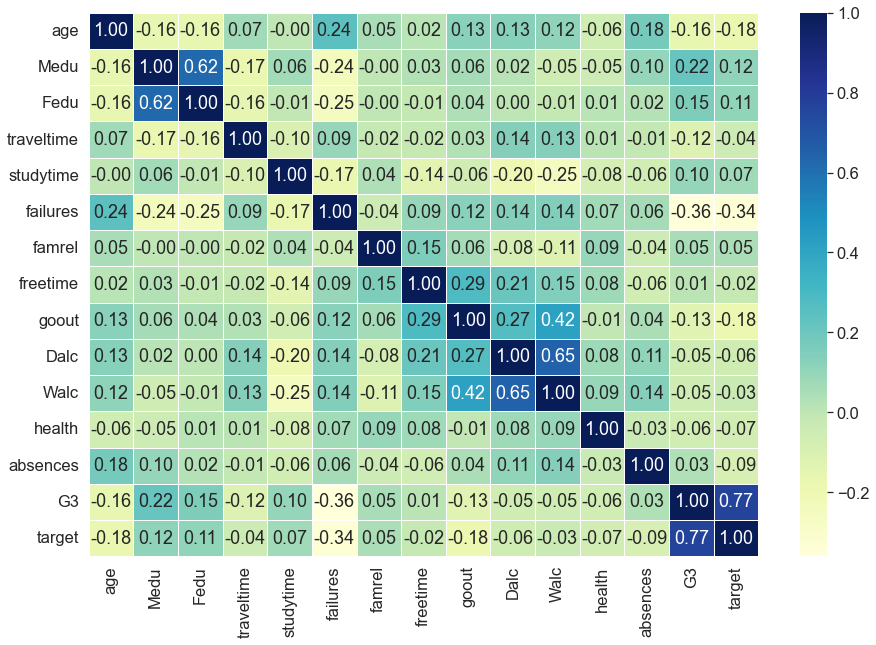

In [85]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


# 5. Modelling

## Split train and test set

In [121]:
# Split data into X and Y
X = df.drop('target', axis=1)
Y = df['target']

# Split into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Encoding Data

In [22]:
import plotly.express as px

In [124]:
fig = px.box(X_train)

fig.show()

In [127]:
object_list = list(df.select_dtypes(include=['object']).columns)

# Converting type of columns to category
for i in object_list:
    df[i] = df[i].astype('category')

    # Assigning numerical values and storing it in another columns 
    new_column = 'enc_'+ str(i)
    df[new_column] = df[i].cat.codes

    # Create an instance of One-hot-encoder
    enc = OneHotEncoder()

    # Passing encoded columns
    enc_data = pd.DataFrame(enc.fit_transform(df[[i]]).toarray())

    # Merge with main dataframe
    df = df.join(enc_data)

df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,enc_reason,enc_guardian,enc_schoolsup,enc_famsup,enc_paid,enc_activities,enc_nursery,enc_higher,enc_internet,enc_romantic
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,1,0,1,1,0,0


In [120]:
df = df._get_numeric_data()


## Creating the logistic regression 

In [122]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [123]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=Y_train,
                             y_test=Y_test)

model_scores

c:\Users\TARISMA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Logistic Regression': 1.0, 'KNN': 0.9113924050632911, 'Random Forest': 1.0}

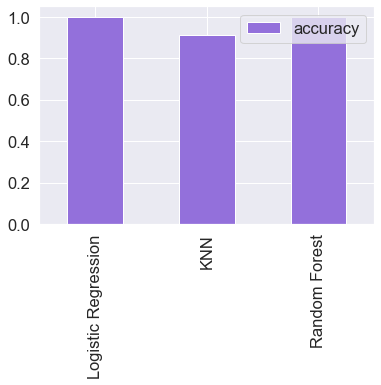

In [128]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color = 'mediumpurple');

### Hyperparameter tuning with RandomizedSearchCV

In [129]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [130]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [131]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [133]:
rs_log_reg.score(X_test, Y_test)

0.9873417721518988

### Hyperparamter Tuning with GridSearchCV

In [134]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [135]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [137]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, Y_test)

0.9746835443037974

0.9747519841269842
[68.49696716]


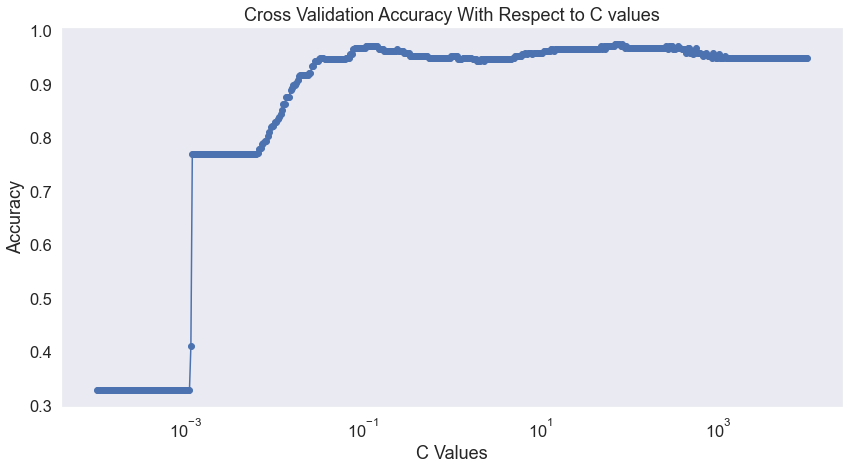

In [138]:
# Creating the logistic regression CV object.  Using the 'l1' penalty, settting the number
# of folds to 5, and the solver to 'liblinear'
logRegCVSDNo0s = LogisticRegressionCV(Cs=500, penalty='l1', cv=5, solver='liblinear')

# Fitting the model
logRegCVSDNo0s.fit(X_train, Y_train)

# Plotting the CV Accuracy with respect to C values
fig, axs = plt.subplots(1, 1, figsize=(14, 7))
axs.plot(logRegCVSDNo0s.Cs_, logRegCVSDNo0s.scores_[1].mean(axis=0), marker='o')
axs.set_xscale('log')
axs.set_title('Cross Validation Accuracy With Respect to C values', fontsize=18)
axs.set_xlabel('C Values')
axs.set_ylabel('Accuracy')
axs.grid()
print(logRegCVSDNo0s.scores_[1].mean(axis=0).max())
print(logRegCVSDNo0s.C_)

## Evaluting our tuned machine learning classifier, beyond accuracy

In [140]:
# Make predictions with tuned model
Y_pred = gs_log_reg.predict(X_test)
Y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [141]:
Y_test

120    1
193    1
354    1
169    1
99     0
      ..
36     1
185    1
92     0
197    1
314    1
Name: target, Length: 79, dtype: int64

c:\Users\TARISMA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



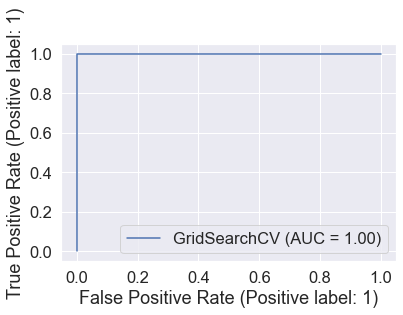

In [142]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, Y_test)

In [143]:
# Confusion matrix
print(confusion_matrix(Y_test, Y_pred))

[[24  2]
 [ 0 53]]


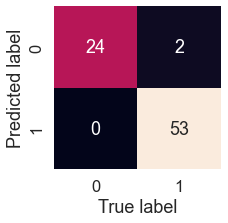

In [144]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, Y_pred)

In [146]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.96      1.00      0.98        53

    accuracy                           0.97        79
   macro avg       0.98      0.96      0.97        79
weighted avg       0.98      0.97      0.97        79



## Calculate evaluation metrics using cross-validation

In [147]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [148]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.7278953843983146,
                         solver="liblinear")

In [150]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.92405063, 0.97468354, 0.93670886, 0.93670886, 0.94936709])

In [151]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9443037974683545

In [152]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9541025753907111

In [154]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9660377358490566

In [153]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9588558235364255

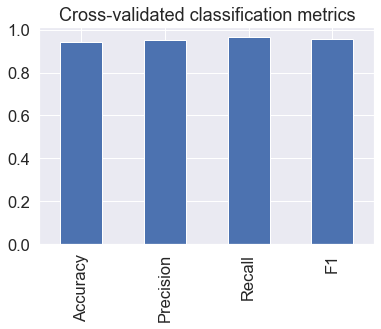

In [155]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [156]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.7278953843983146,
                         solver="liblinear")

clf.fit(X_train, Y_train);

In [157]:
# Check coef_
clf.coef_

array([[-1.2000248 ,  0.11205892, -0.31987194,  0.15947532, -0.29817077,
        -0.00855588,  0.34122004, -0.15805914, -0.12477659, -0.30336072,
         0.29492108, -0.3026258 ,  0.01239092,  2.66908896,  0.67328046,
        -0.22817845, -0.0142352 ,  0.03289719, -0.30229813, -0.22425214,
        -0.21783563, -0.23974553,  0.04200313, -0.44650283, -0.23317745,
         0.24555808, -0.38412294, -0.49077464, -0.44667699, -0.12919628,
        -0.31947435]])

In [158]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,enc_reason,enc_guardian,enc_schoolsup,enc_famsup,enc_paid,enc_activities,enc_nursery,enc_higher,enc_internet,enc_romantic
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,1,0,1,1,0,0


In [164]:
# Match coef's of features to columns
feature_dict = dict(zip(X_train.columns, list(clf.coef_[0])))
feature_dict

{'age': -1.2000248029322653,
 'Medu': 0.11205891603032284,
 'Fedu': -0.3198719411235857,
 'traveltime': 0.15947531798097972,
 'studytime': -0.2981707665083476,
 'failures': -0.008555883642877812,
 'famrel': 0.34122003823226366,
 'freetime': -0.15805914256362205,
 'goout': -0.12477658808104257,
 'Dalc': -0.30336072099885864,
 'Walc': 0.29492107570824644,
 'health': -0.302625800012041,
 'absences': 0.012390917555411435,
 'G3': 2.6690889599527536,
 'enc_school': 0.6732804607062123,
 'enc_sex': -0.22817845497034242,
 'enc_address': -0.014235202008632486,
 'enc_famsize': 0.03289718638138169,
 'enc_Pstatus': -0.3022981258637176,
 'enc_Mjob': -0.22425213985518014,
 'enc_Fjob': -0.21783562659862102,
 'enc_reason': -0.23974553376346097,
 'enc_guardian': 0.042003128477195735,
 'enc_schoolsup': -0.4465028327570494,
 'enc_famsup': -0.23317745483737912,
 'enc_paid': 0.2455580817101528,
 'enc_activities': -0.3841229421553908,
 'enc_nursery': -0.4907746387771579,
 'enc_higher': -0.4466769946547533,
 

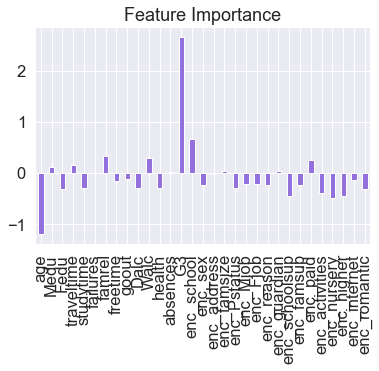

In [166]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color='mediumpurple');